In [1]:
import sys
sys.path.append("../") 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from scripts.utilities import *
import numpy as np

pd.options.display.max_rows = 200
pd.set_option('display.max_columns', None)


# Modeling Notebook
Will be starting the modeling process in this notebook. Will tryout classification, regression, and clustering.

I will be focusing on white-box algorithms for aid in interpretability

Need to revisit how sample weights should be implemented in the model 
- https://scikit-learn.org/stable/auto_examples/svm/plot_weighted_samples.html
- https://stats.stackexchange.com/questions/362987/how-do-sample-weights-work-in-classification-models
- https://blog.davidvassallo.me/2019/12/18/machine-learning-oversampling-vs-sample-weighting/

import pandas as pd
import numpy as np
import sklearn.preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

# Pre-processing

In [2]:
df = pd.read_csv('../data_sets/df_cleaned.csv')

In [3]:
df

,Unnamed: 0,PUMA,NP,ACCESS,BATH,BDSP,BLD,BROADBND,COMPOTHX,DIALUP,ELEFP,ELEP,FS,FULFP,GASFP,HFL,HISPEED,LAPTOP,OTHSVCEX,REFR,RMSP,RNTM,RNTP,RWAT,SATELLITE,SINK,SMARTPHONE,STOV,TABLET,TEL,TEN,VEH,WATFP,YBL,GRNTP,GRPIP,HHL,HHLANP,HHT,HINCP,HUGCL,HUPAC,HUPAOC,HUPARC,KIT,LNGI,MULTG,MV,NOC,NPP,NR,NRC,PARTNER,PLM,PSF,R18,R60,R65,RESMODE,SRNT,SSMC,WGTP_CLT,AMI,AFF_OCC,COST_BURDALL
0,0,3102,5,1.0,1,3,2,1.0,2.0,2.0,3.0,100.0,1.0,2.0,4.0,3.0,1.0,1.0,2.0,1,5,2.0,800.0,1,2.0,1,1.0,1,1.0,1.0,3.0,1.0,3.0,5,1013.0,68.0,1.0,9500.0,3.0,18000.0,0.0,3.0,3.0,3.0,1,1.0,1.0,4.0,3.0,0.0,0.0,3.0,0.0,1,0.0,1.0,1.0,1.0,2,1,0.0,200.33,1.0,3.0,1.0
1,1,3104,1,1.0,1,2,6,1.0,2.0,2.0,3.0,120.0,2.0,2.0,3.0,3.0,1.0,1.0,2.0,1,7,2.0,1100.0,1,2.0,1,1.0,1,1.0,1.0,3.0,1.0,3.0,6,1223.0,20.0,1.0,9500.0,4.0,72000.0,0.0,4.0,4.0,4.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,3,1,0.0,111.87,7.0,4.0,0.0
2,3,3101,2,1.0,1,3,2,1.0,2.0,2.0,3.0,170.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,1,5,2.0,600.0,1,2.0,1,1.0,1,2.0,1.0,3.0,2.0,3.0,5,883.0,19.0,1.0,9500.0,1.0,56600.0,0.0,4.0,4.0,4.0,1,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,2,1,0.0,90.00,5.0,2.0,0.0
3,4,3105,4,1.0,1,2,7,1.0,2.0,2.0,3.0,80.0,2.0,2.0,3.0,3.0,1.0,1.0,2.0,1,6,2.0,800.0,1,2.0,1,1.0,1,1.0,1.0,3.0,2.0,3.0,6,912.0,18.0,1.0,9500.0,1.0,59400.0,0.0,2.0,2.0,2.0,1,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,1,0.0,1.0,0.0,0.0,3,1,0.0,61.87,5.0,3.0,0.0
4,5,3101,1,2.0,1,0,9,1.0,2.0,2.0,3.0,30.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1,1,2.0,1400.0,1,2.0,1,1.0,1,1.0,1.0,3.0,1.0,3.0,12,1454.0,11.0,1.0,9500.0,4.0,160000.0,0.0,4.0,4.0,4.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,3,1,0.0,95.00,7.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,1749,3108,2,1.0,1,3,5,1.0,2.0,2.0,3.0,170.0,2.0,2.0,3.0,3.0,1.0,2.0,2.0,1,8,2.0,1800.0,1,2.0,1,1.0,1,1.0,1.0,3.0,3.0,2.0,18,1970.0,12.0,1.0,9500.0,1.0,204100.0,0.0,4.0,4.0,4.0,1,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,1.0,3,1,0.0,69.02,7.0,6.0,0.0
1538,1750,3107,4,1.0,1,2,8,1.0,2.0,2.0,3.0,90.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,1,8,2.0,850.0,1,2.0,1,1.0,1,1.0,1.0,3.0,1.0,3.0,7,941.0,27.0,1.0,9500.0,1.0,42000.0,0.0,1.0,1.0,1.0,1,1.0,1.0,3.0,2.0,0.0,0.0,2.0,0.0,1,0.0,1.0,0.0,0.0,3,1,0.0,56.28,3.0,3.0,0.0
1539,1751,3101,2,1.0,1,1,9,1.0,2.0,2.0,3.0,80.0,2.0,2.0,3.0,3.0,1.0,1.0,2.0,1,2,2.0,1300.0,1,2.0,1,1.0,1,2.0,1.0,3.0,2.0,3.0,19,1422.0,20.0,1.0,9500.0,5.0,86000.0,0.0,4.0,4.0,4.0,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,1,0.0,0.0,0.0,0.0,3,1,0.0,40.00,7.0,6.0,0.0
1540,1752,3101,1,1.0,1,1,7,1.0,2.0,2.0,3.0,110.0,2.0,2.0,3.0,3.0,1.0,1.0,2.0,1,3,2.0,720.0,1,2.0,1,1.0,1,1.0,1.0,3.0,1.0,1.0,1,830.0,28.0,1.0,9500.0,6.0,35100.0,0.0,4.0,4.0,4.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,2,1,0.0,159.00,4.0,3.0,0.0


Most of the cleaning was already completed in the last notebook... However some additional steps may be needed.

In [4]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
df.shape

(1542, 64)

In [6]:
df.isna().any()

PUMA            False
NP              False
ACCESS          False
BATH            False
BDSP            False
BLD             False
BROADBND        False
COMPOTHX        False
DIALUP          False
ELEFP           False
ELEP            False
FS              False
FULFP           False
GASFP           False
HFL             False
HISPEED         False
LAPTOP          False
OTHSVCEX        False
REFR            False
RMSP            False
RNTM            False
RNTP            False
RWAT            False
SATELLITE       False
SINK            False
SMARTPHONE      False
STOV            False
TABLET          False
TEL             False
TEN             False
VEH             False
WATFP           False
YBL             False
GRNTP           False
GRPIP           False
HHL             False
HHLANP          False
HHT             False
HINCP           False
HUGCL           False
HUPAC           False
HUPAOC          False
HUPARC          False
KIT             False
LNGI            False
MULTG     

In [7]:
df.dtypes

PUMA              int64
NP                int64
ACCESS          float64
BATH              int64
BDSP              int64
BLD               int64
BROADBND        float64
COMPOTHX        float64
DIALUP          float64
ELEFP           float64
ELEP            float64
FS              float64
FULFP           float64
GASFP           float64
HFL             float64
HISPEED         float64
LAPTOP          float64
OTHSVCEX        float64
REFR              int64
RMSP              int64
RNTM            float64
RNTP            float64
RWAT              int64
SATELLITE       float64
SINK              int64
SMARTPHONE      float64
STOV              int64
TABLET          float64
TEL             float64
TEN             float64
VEH             float64
WATFP           float64
YBL               int64
GRNTP           float64
GRPIP           float64
HHL             float64
HHLANP          float64
HHT             float64
HINCP           float64
HUGCL           float64
HUPAC           float64
HUPAOC          

Just confirming that there are no nulls and everything is a numeric value at this point

In [8]:
correlations = df.corr()

<AxesSubplot:>

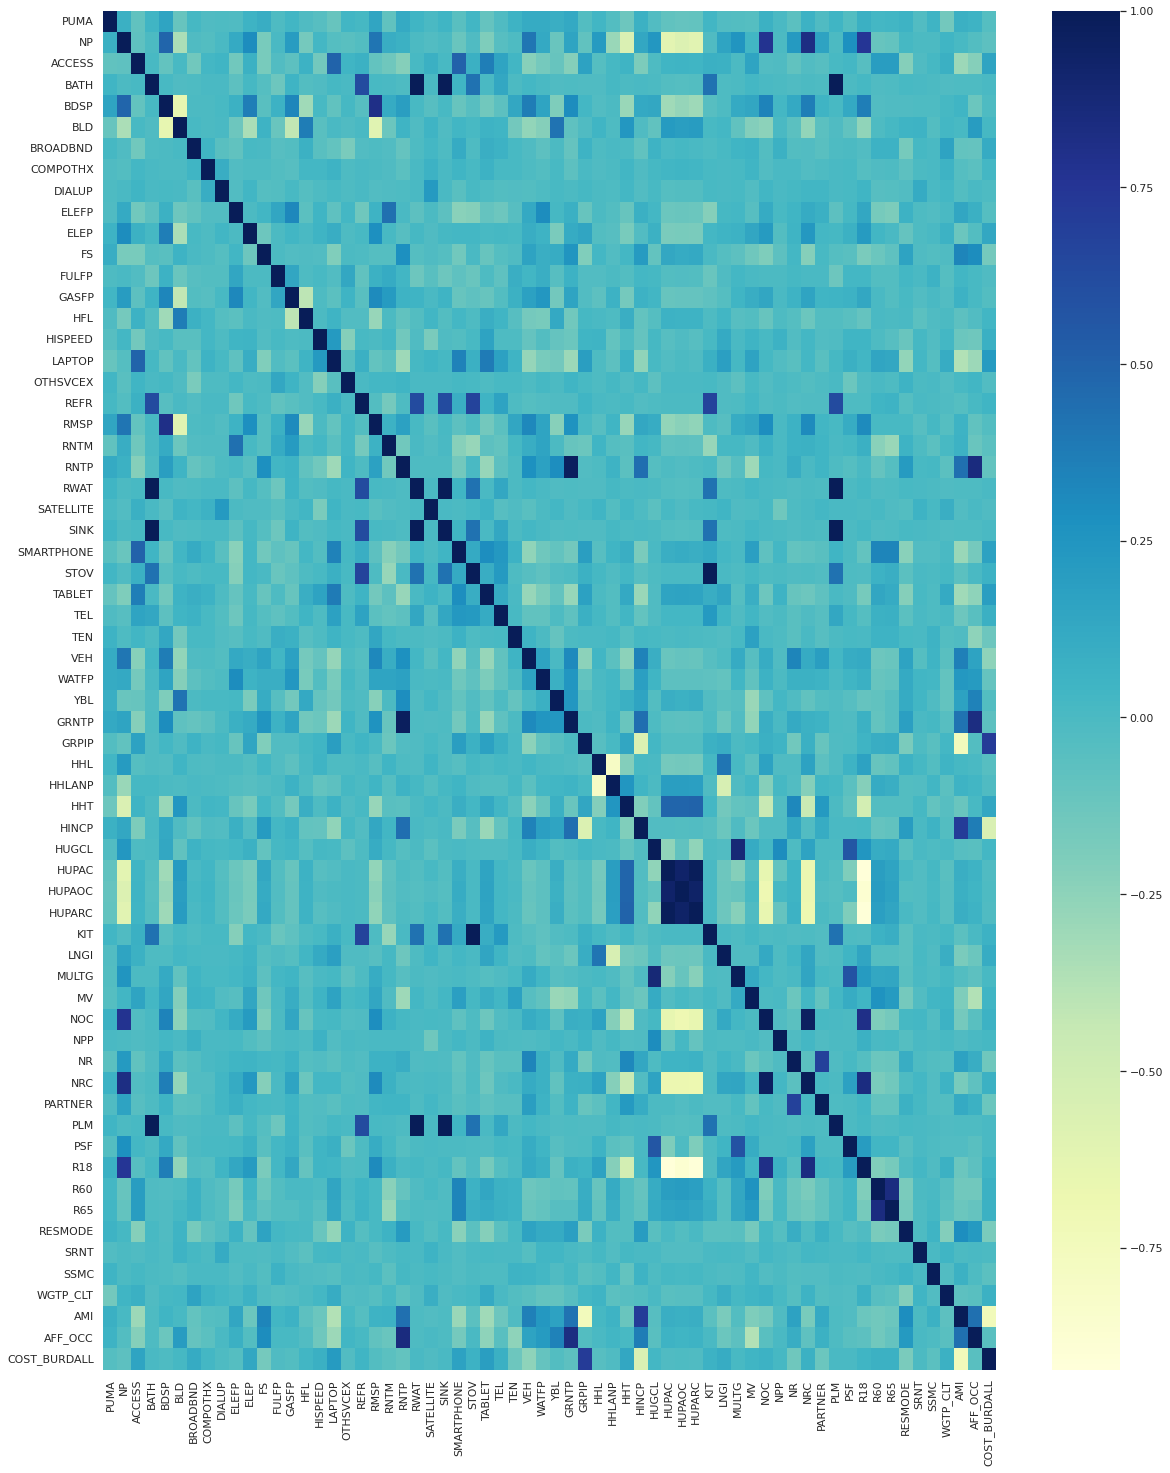

In [9]:
sns.set(rc={"figure.figsize":(20,25)})
sns.heatmap(correlations, cmap="YlGnBu", annot=False)

We can see some multi-collinearity going on. Let's remove collinear features

In [10]:
#Creating a dictionary of columns with high correlations 
corr_array = correlations.to_numpy()
high_corr = {}
cols = df.columns

for i in range(len(corr_array)):
    temp = list(np.where(corr_array[i] > 0.70)[0])
    if len(temp) < 2:
        continue
    temp.pop(temp.index(i))
    high_corr[cols[i]] = list(cols[temp])

In [11]:
high_corr

{'NP': ['NOC', 'NRC', 'R18'],
 'BATH': ['RWAT', 'SINK', 'PLM'],
 'BDSP': ['RMSP'],
 'RMSP': ['BDSP'],
 'RNTP': ['GRNTP', 'AFF_OCC'],
 'RWAT': ['BATH', 'SINK', 'PLM'],
 'SINK': ['BATH', 'RWAT', 'PLM'],
 'STOV': ['KIT'],
 'GRNTP': ['RNTP', 'AFF_OCC'],
 'GRPIP': ['COST_BURDALL'],
 'HINCP': ['AMI'],
 'HUGCL': ['MULTG'],
 'HUPAC': ['HUPAOC', 'HUPARC'],
 'HUPAOC': ['HUPAC', 'HUPARC'],
 'HUPARC': ['HUPAC', 'HUPAOC'],
 'KIT': ['STOV'],
 'MULTG': ['HUGCL'],
 'NOC': ['NP', 'NRC', 'R18'],
 'NRC': ['NP', 'NOC', 'R18'],
 'PLM': ['BATH', 'RWAT', 'SINK'],
 'R18': ['NP', 'NOC', 'NRC'],
 'R60': ['R65'],
 'R65': ['R60'],
 'AMI': ['HINCP'],
 'AFF_OCC': ['RNTP', 'GRNTP'],
 'COST_BURDALL': ['GRPIP']}

In [12]:
#Get actual correlation value and decide which to drop
for i in high_corr:
    print(i+' correlates with:')
    print(correlations.loc[i][high_corr[i]])
    print('-------------------------------')
    


NP correlates with:
NOC    0.773397
NRC    0.824704
R18    0.748666
Name: NP, dtype: float64
-------------------------------
BATH correlates with:
RWAT    1.0
SINK    1.0
PLM     1.0
Name: BATH, dtype: float64
-------------------------------
BDSP correlates with:
RMSP    0.810783
Name: BDSP, dtype: float64
-------------------------------
RMSP correlates with:
BDSP    0.810783
Name: RMSP, dtype: float64
-------------------------------
RNTP correlates with:
GRNTP      0.975929
AFF_OCC    0.844384
Name: RNTP, dtype: float64
-------------------------------
RWAT correlates with:
BATH    1.0
SINK    1.0
PLM     1.0
Name: RWAT, dtype: float64
-------------------------------
SINK correlates with:
BATH    1.0
RWAT    1.0
PLM     1.0
Name: SINK, dtype: float64
-------------------------------
STOV correlates with:
KIT    1.0
Name: STOV, dtype: float64
-------------------------------
GRNTP correlates with:
RNTP       0.975929
AFF_OCC    0.833387
Name: GRNTP, dtype: float64
------------------------

- After inspects the high correlating features, I've manually compiled a list of ones to drop
- Also target features were likely derived from existing features. 
    - AFF_OCC: 'RNTP', 'GRNTP'
    - COST_BURDALL: 'GRPIP'
    - AMI: 'HINCP'


In [13]:
to_drop = ['RWAT', 'SINK', 'PLM', 'GRNTP', 'STOV', 'HUGCL', 'HUPAOC', 'HUPARC', 'NRC', 'R60']

In [14]:
df.shape

(1542, 64)

In [15]:
df.drop(columns = to_drop, inplace = True)
df.shape

(1542, 54)

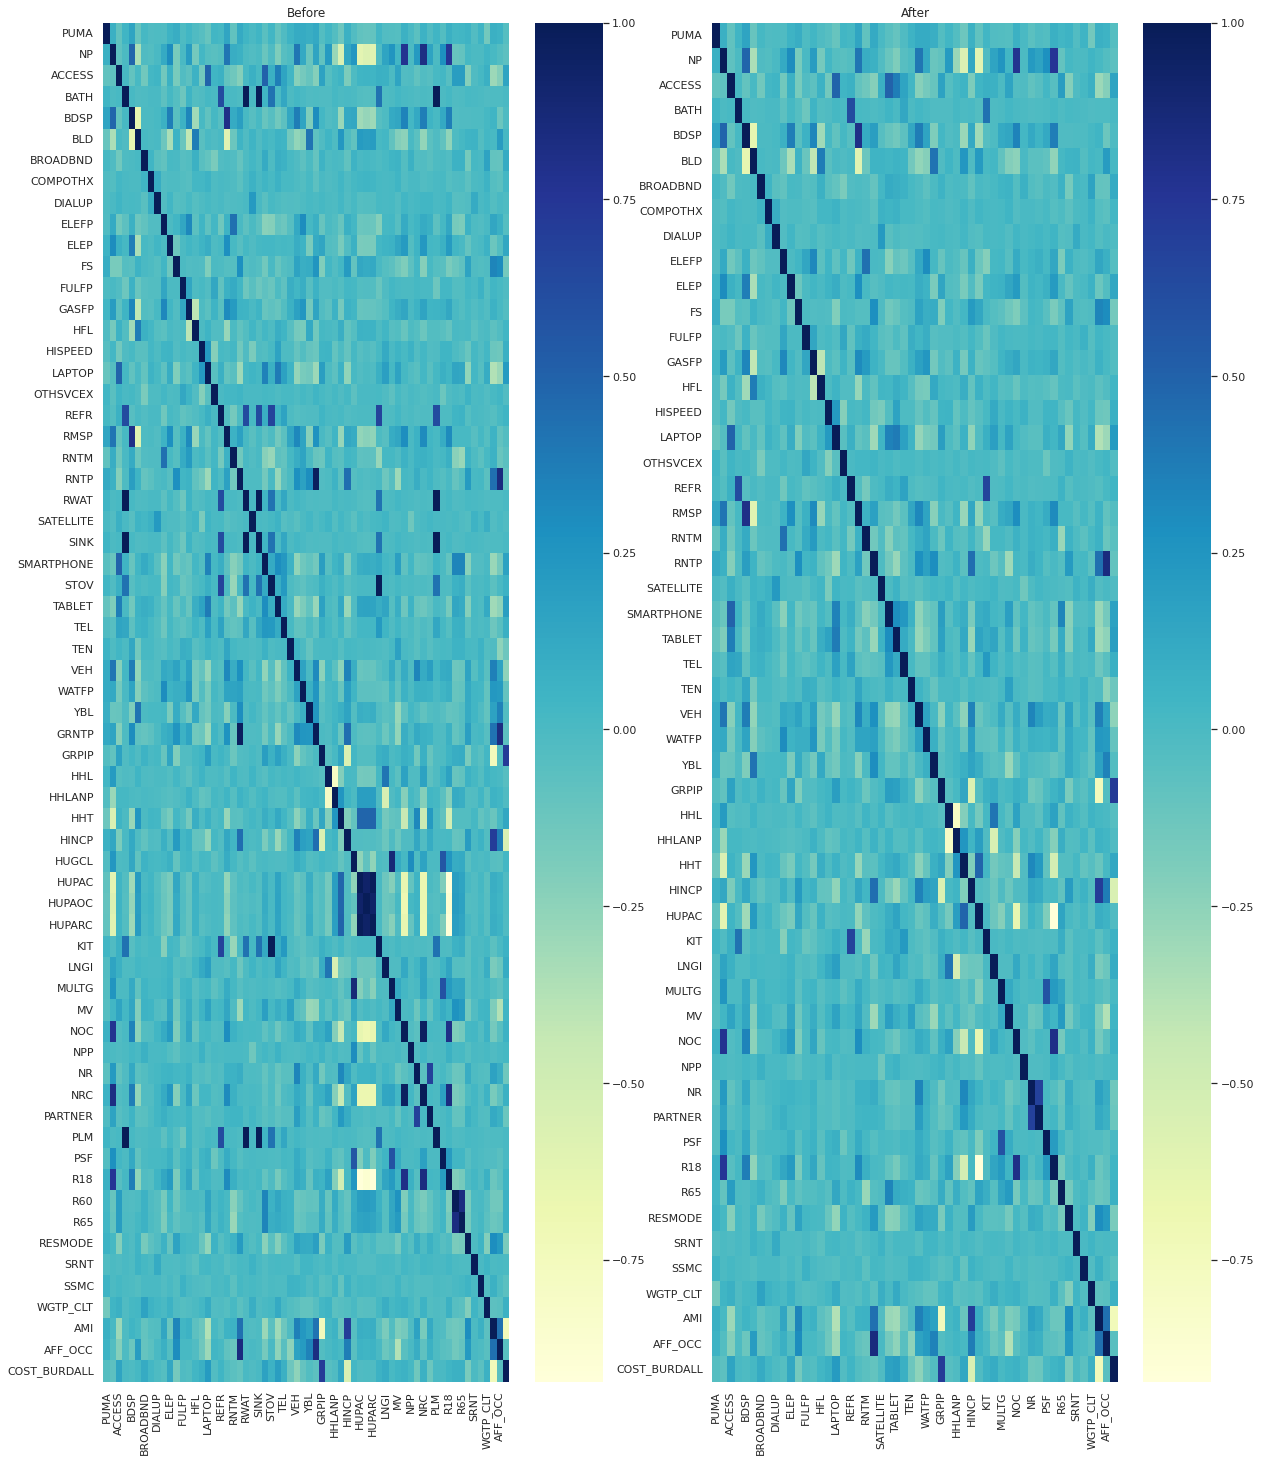

In [16]:
correlations2 = df.corr()
fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(correlations, cmap="YlGnBu", annot=False, ax=ax1).set(title = 'Before')
sns.heatmap(correlations2, cmap="YlGnBu", annot=False, ax=ax2).set(title = 'After')
plt.show()

# Model Implementation: Classification

Our target for classifcation will be COST_BURDALL. This feature is a binary value representing wether or not a household is cost burdened. I will be implementing "white-box" algorithms such as decision trees and logistic regression for the sake of model transparency. 

In [17]:
from pycaret.classification import *

In [18]:
df_classification = df.drop(columns = ['GRPIP', 'AFF_OCC', 'AMI'])

In [19]:
df_classification.shape

(1542, 51)

In [20]:
clf = setup(data=df_classification, target = 'COST_BURDALL')

,Description,Value
0,session_id,6920
1,Target,COST_BURDALL
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(1542, 51)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,30
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
#compare all models cause why not
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9537,0.9825,0.9519,0.9449,0.9478,0.9062,0.9070,0.4340
ada,Ada Boost Classifier,0.9537,0.9910,0.9561,0.9411,0.9480,0.9062,0.9072,0.1010
gbc,Gradient Boosting Classifier,0.9509,0.9906,0.9456,0.9455,0.9447,0.9005,0.9019,0.1500
lightgbm,Light Gradient Boosting Machine,0.9500,0.9920,0.9373,0.9496,0.9431,0.8985,0.8990,0.0730
dt,Decision Tree Classifier,0.9435,0.9429,0.9373,0.9367,0.9362,0.8855,0.8867,0.0180
rf,Random Forest Classifier,0.8814,0.9490,0.8978,0.8454,0.8701,0.7612,0.7636,0.1860
knn,K Neighbors Classifier,0.8786,0.9420,0.8852,0.8498,0.8664,0.7554,0.7570,0.0310
ridge,Ridge Classifier,0.8258,0.0000,0.8284,0.7884,0.8074,0.6485,0.6499,0.0230
nb,Naive Bayes,0.8221,0.8895,0.8936,0.7522,0.8160,0.6462,0.6570,0.0190
lda,Linear Discriminant Analysis,0.8174,0.9030,0.8242,0.7770,0.7993,0.6321,0.6341,0.0420


I am very impressed by the results... 

## Random Forest

In [22]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9259,0.9637,0.9574,0.8824,0.9184,0.8508,0.8532
1,0.8241,0.8830,0.8333,0.7843,0.8081,0.6460,0.6470
2,0.8611,0.9457,0.8542,0.8367,0.8454,0.7193,0.7195
3,0.8889,0.9688,0.9583,0.8214,0.8846,0.7787,0.7873
4,0.8796,0.9483,0.9167,0.8302,0.8713,0.7588,0.7621
5,0.8889,0.9530,0.8542,0.8913,0.8723,0.7741,0.7746
6,0.8796,0.9491,0.8542,0.8723,0.8632,0.7557,0.7559
7,0.8889,0.9630,0.8958,0.8600,0.8776,0.7759,0.7765
8,0.8519,0.9517,0.8750,0.8077,0.8400,0.7025,0.7044


In [23]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9352,0.9782,0.9574,0.9000,0.9278,0.8691,0.8705
1,0.8704,0.9639,0.9375,0.8036,0.8654,0.7418,0.7500
2,0.9259,0.9427,0.8750,0.9545,0.9130,0.8487,0.8512
3,0.9074,0.9799,1.0000,0.8276,0.9057,0.8163,0.8305
4,0.9259,0.9778,0.9583,0.8846,0.9200,0.8512,0.8536
5,0.9537,0.9788,0.9583,0.9388,0.9485,0.9064,0.9066
6,0.9074,0.9484,0.8958,0.8958,0.8958,0.8125,0.8125
7,0.9630,0.9872,1.0000,0.9231,0.9600,0.9256,0.9282
8,0.9074,0.9569,0.9167,0.8800,0.8980,0.8133,0.8138


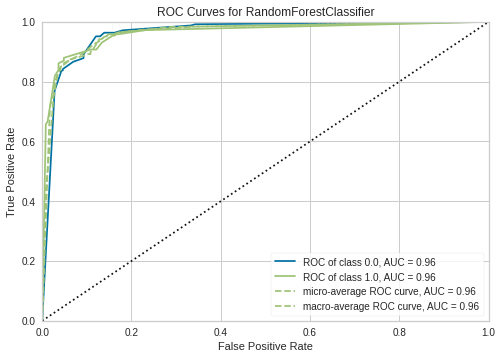

In [24]:
plot_model(tuned_rf, plot = 'auc')

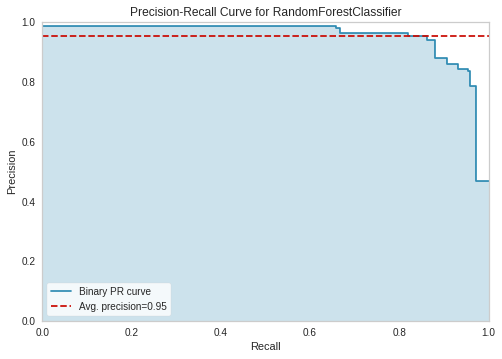

In [25]:
plot_model(tuned_rf, plot = 'pr')

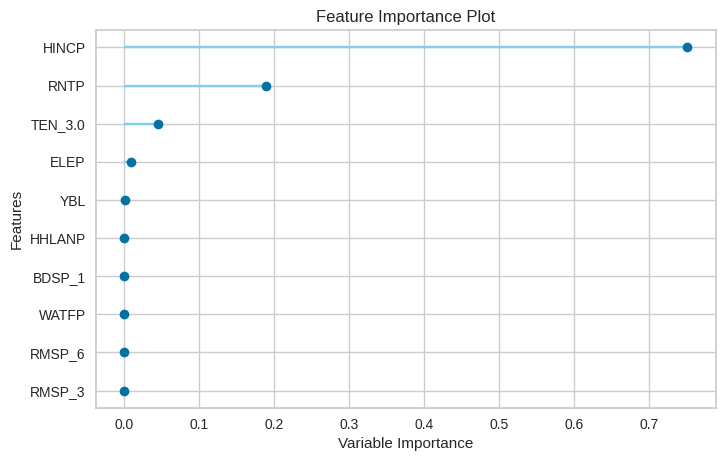

In [26]:
plot_model(tuned_rf, plot = 'feature')

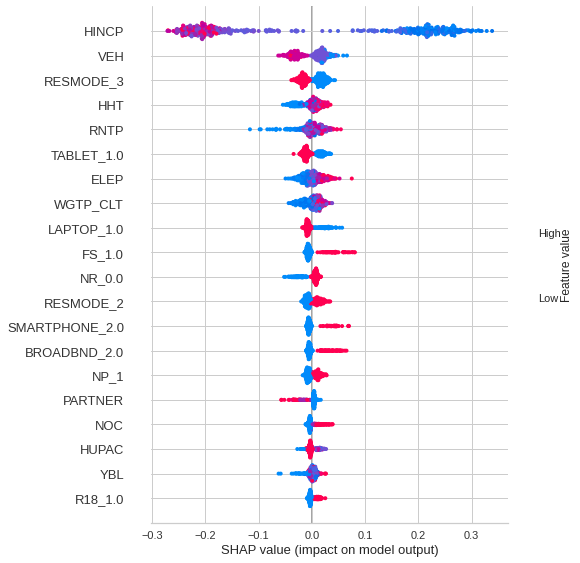

In [27]:
interpret_model(rf)

**NOTE**: These plots show correlation but not necessarily causation
- https://shap.readthedocs.io/en/latest/example_notebooks/overviews/Be%20careful%20when%20interpreting%20predictive%20models%20in%20search%20of%20causal%C2%A0insights.html


Very intuitively, the model emphasized Household Income (HINCP) and Monthly Rent (RNTP) to determine if a household is cost_burdened. Coming in thurd however, Tenure (TEN) is interesting to see. It specifies wether or not a tenant is renting or owning, or owning with a loan.

## Logistic Regression

In [28]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9352,0.9693,0.9149,0.9348,0.9247,0.8678,0.8680
1,0.9630,0.9920,0.9167,1.0000,0.9565,0.9244,0.9270
2,0.9259,0.9514,0.9167,0.9167,0.9167,0.8500,0.8500
3,0.9537,0.9830,0.9792,0.9216,0.9495,0.9068,0.9083
4,0.9722,0.9983,1.0000,0.9412,0.9697,0.9441,0.9456
5,0.9444,0.9889,0.9375,0.9375,0.9375,0.8875,0.8875
6,0.9444,0.9785,0.9167,0.9565,0.9362,0.8870,0.8877
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9352,0.9705,0.9583,0.9020,0.9293,0.8696,0.8709


In [29]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Some rather different features were selected for their importantance under the Logistic Regression model

## LightGBM

In [30]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9630,0.9885,0.9574,0.9574,0.9574,0.9247,0.9247
1,0.9352,0.9875,0.9375,0.9184,0.9278,0.8690,0.8692
2,0.9352,0.9865,0.8958,0.9556,0.9247,0.8679,0.8693
3,0.9444,0.9958,0.9583,0.9200,0.9388,0.8880,0.8886
4,0.9352,0.9847,0.9167,0.9362,0.9263,0.8685,0.8686
5,0.9537,0.9965,0.9167,0.9778,0.9462,0.9057,0.9071
6,0.9259,0.9889,0.8958,0.9348,0.9149,0.8494,0.8500
7,0.9815,1.0000,1.0000,0.9600,0.9796,0.9627,0.9633
8,0.9630,0.9955,0.9375,0.9783,0.9574,0.9247,0.9253


In [31]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

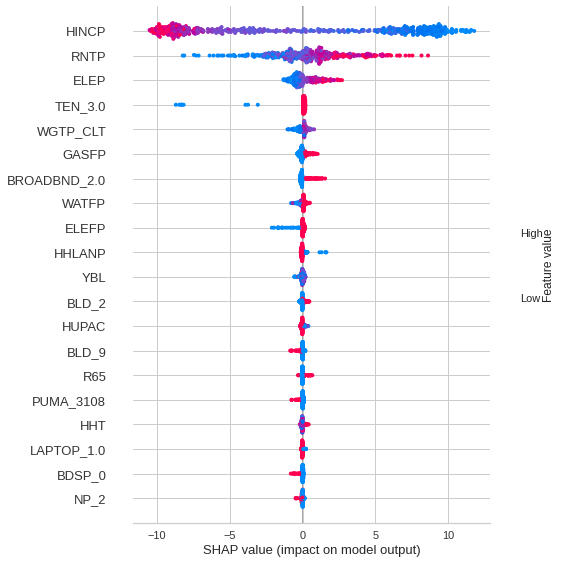

In [32]:
interpret_model(lightgbm)

In [33]:
lightgbm_tuned = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9630,0.9906,0.9574,0.9574,0.9574,0.9247,0.9247
1,0.9352,0.9812,0.9375,0.9184,0.9278,0.8690,0.8692
2,0.9074,0.9806,0.8750,0.9130,0.8936,0.8117,0.8123
3,0.9815,0.9979,1.0000,0.9600,0.9796,0.9627,0.9633
4,0.9352,0.9913,0.9583,0.9020,0.9293,0.8696,0.8709
5,0.9722,0.9955,0.9792,0.9592,0.9691,0.9439,0.9440
6,0.9167,0.9809,0.8958,0.9149,0.9053,0.8309,0.8310
7,0.9722,0.9997,1.0000,0.9412,0.9697,0.9441,0.9456
8,0.9352,0.9906,0.9583,0.9020,0.9293,0.8696,0.8709


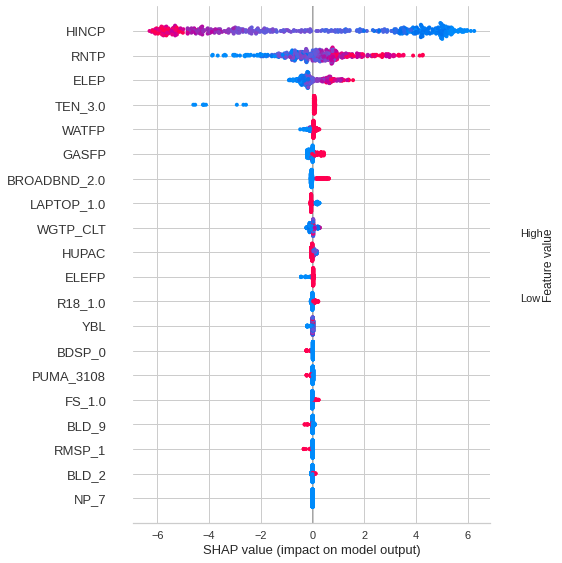

In [34]:
interpret_model(lightgbm_tuned)

Light GBM emphasizes 

## Compare Models with HINCP dropped

In [35]:
df_temp = df_classification.drop(columns = 'HINCP')

In [36]:
clf3 = setup(data=df_temp, target = 'COST_BURDALL')

,Description,Value
0,session_id,3629
1,Target,COST_BURDALL
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(1542, 50)"
5,Missing Values,False
6,Numeric Features,19
7,Categorical Features,30
8,Ordinal Features,False
9,High Cardinality Features,False


In [35]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.6803,0.0000,0.6132,0.6606,0.6347,0.3515,0.3532,0.0210
gbc,Gradient Boosting Classifier,0.6793,0.7396,0.5885,0.6673,0.6243,0.3468,0.3496,0.1410
lda,Linear Discriminant Analysis,0.6784,0.7376,0.6254,0.6537,0.6380,0.3492,0.3505,0.0320
lr,Logistic Regression,0.6747,0.7421,0.5929,0.6596,0.6225,0.3387,0.3416,0.3120
nb,Naive Bayes,0.6673,0.7028,0.5887,0.6473,0.6153,0.3238,0.3258,0.0190
ada,Ada Boost Classifier,0.6655,0.7270,0.6050,0.6401,0.6217,0.3224,0.3231,0.0970
lightgbm,Light Gradient Boosting Machine,0.6571,0.7222,0.5927,0.6303,0.6105,0.3050,0.3057,0.0670
rf,Random Forest Classifier,0.6432,0.7084,0.5358,0.6235,0.5744,0.2715,0.2745,0.2190
et,Extra Trees Classifier,0.6349,0.6842,0.5542,0.6067,0.5769,0.2580,0.2598,0.1910
dt,Decision Tree Classifier,0.5635,0.5601,0.5216,0.5211,0.5204,0.1202,0.1206,0.0180


Accuracy is significantly worse without the Household Income metric.